In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

data_dir = pathlib.Path("Dataset").with_suffix('')

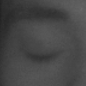

In [3]:
closed_eyes = list(data_dir.glob('Closed_Eyes/*'))
PIL.Image.open(str(closed_eyes[0]))

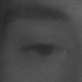

In [4]:
open_eyes = list(data_dir.glob('Open_Eyes/*'))
PIL.Image.open(str(open_eyes[0]))

In [5]:
batch_size = 32
img_height = 224
img_width = 224

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 84910 files belonging to 3 classes.
Using 67928 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.2, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)

Found 84910 files belonging to 3 classes.
Using 16982 files for validation.


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
class_names = ['Closed_Eyes','Open_Eyes']
num_classes = len(class_names)

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1)
])

model = tf.keras.Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,446,498 (24.59 MB)

 Trainable params: 6,446,498 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
epochs = 4

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, steps_per_epoch=200, validation_steps=20)
# history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/4
200/200 ━━━━━━━━━━━━━━━━━━━━ 229s 720ms/step - accuracy: 0.6633 - loss: 0.6442 - val_accuracy: 0.8875 - val_loss: 0.2791
Epoch 2/4
 58/200 ━━━━━━━━━━━━━━━━━━━━ 1:39 698ms/step - accuracy: 0.8721 - loss: 0.3129

InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 604, in run_forever

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1909, in _run_once

  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\hp\AppData\Local\Temp\ipykernel_2832\3546611602.py", line 3, in <module>

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\trainers\trainer.py", line 398, in _compute_loss

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\trainers\trainer.py", line 366, in compute_loss

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\trainers\compile_utils.py", line 618, in __call__

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\trainers\compile_utils.py", line 659, in call

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\losses\loss.py", line 60, in __call__

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\losses\losses.py", line 1870, in sparse_categorical_crossentropy

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\ops\nn.py", line 1559, in sparse_categorical_crossentropy

  File "c:\Users\hp\pyenv123\pyenv123\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 0 1 0 1 0 0 1 1 0 0 0 0 1 1 2 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_2586]

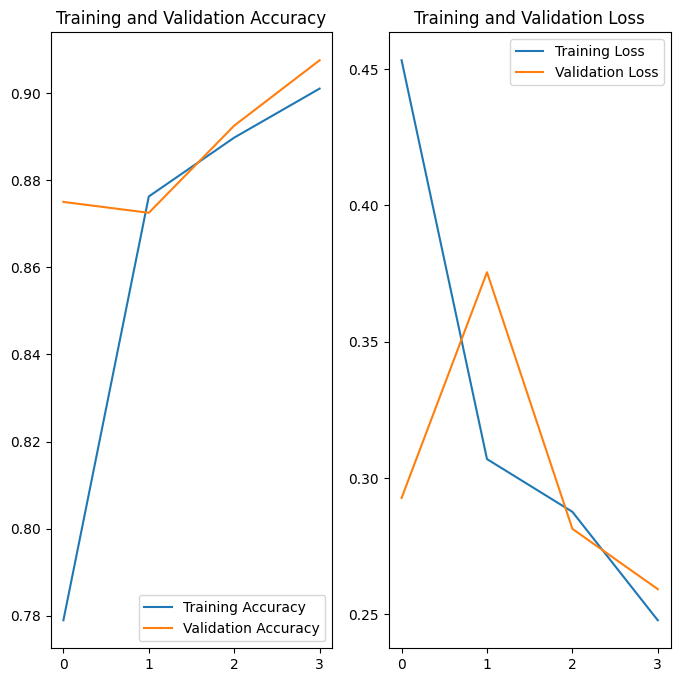

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save("Models/Image_Classification_Model_epochs-5_epochssteps-500_dataset-84898.h5")

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('Models/TFLite/Image_Classification_Model_epochs-5_epochssteps-500_dataset-84898.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpzgrnehk8\assets


INFO:tensorflow:Assets written to: C:\Users\hp\AppData\Local\Temp\tmpzgrnehk8\assets


Saved artifact at 'C:\Users\hp\AppData\Local\Temp\tmpzgrnehk8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2160030704144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2160030708368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2160030708176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2160030707408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2160030707216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2160030706448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2160030706064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2160030705104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2160030707024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2160030711056: TensorSpec(shape=(), dtype=tf.resource, name=None)
